In [3]:
import cv2
import tensorflow as tf
import mediapipe as mp
import sklearn
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%config Completer.use_jedi = False

In [29]:
mp_holistic = mp.solutions.holistic
mp_drawings = mp.solutions.drawing_utils

In [17]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    return image, results

In [30]:
def draw_landmarks(image, results):
    mp_drawings.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    mp_drawings.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawings.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawings.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [46]:
cap = cv2.VideoCapture("video.mp4")

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        success, frame = cap.read()
        
#         image, results = mediapipe_detection(frame, holistic)
#         print(results)

#         draw_landmarks(image, results)
        
        if success == True:
            image, results = mediapipe_detection(frame, holistic)
            draw_landmarks(image, results)
            
            cv2.imshow("video", image)
            key = cv2.waitKey(1)
            if key == ord('q'):
                break

        else:
            break
        
cap.release()
cv2.destroyAllWindows()

In [45]:
cap.release()
cv2.destroyAllWindows()

In [26]:
results.face_landmarks.landmark

[x: 0.4866591989994049
y: 0.5554305911064148
z: -0.028125880286097527
, x: 0.4843536913394928
y: 0.48535624146461487
z: -0.055600859224796295
, x: 0.4852704405784607
y: 0.50574791431427
z: -0.02802378684282303
, x: 0.4736054837703705
y: 0.42217564582824707
z: -0.04357079789042473
, x: 0.4837014377117157
y: 0.46529069542884827
z: -0.05960191786289215
, x: 0.4830262362957001
y: 0.439357727766037
z: -0.056345269083976746
, x: 0.4814142882823944
y: 0.37712937593460083
z: -0.030894959345459938
, x: 0.409036248922348
y: 0.3806150257587433
z: 0.011269493028521538
, x: 0.48039886355400085
y: 0.3341047465801239
z: -0.02655119262635708
, x: 0.47978511452674866
y: 0.30833208560943604
z: -0.03009985201060772
, x: 0.47677621245384216
y: 0.20707640051841736
z: -0.02188762277364731
, x: 0.486924409866333
y: 0.5657963752746582
z: -0.026310017332434654
, x: 0.48720583319664
y: 0.5733076333999634
z: -0.02232871577143669
, x: 0.48736444115638733
y: 0.5760420560836792
z: -0.017324747517704964
, x: 0.48772

In [27]:
len(results.face_landmarks.landmark)

468

In [25]:
results.pose_landmarks.landmark

[x: 0.4841395318508148
y: 0.49304288625717163
z: -0.9653314352035522
visibility: 0.9996917247772217
, x: 0.516150951385498
y: 0.39213672280311584
z: -0.9210197329521179
visibility: 0.9993351697921753
, x: 0.5349013805389404
y: 0.39151811599731445
z: -0.9211495518684387
visibility: 0.9994552731513977
, x: 0.5479884147644043
y: 0.39243999123573303
z: -0.9214480519294739
visibility: 0.9991838932037354
, x: 0.4539673328399658
y: 0.39395958185195923
z: -0.9176265597343445
visibility: 0.9994447827339172
, x: 0.4342311918735504
y: 0.39424723386764526
z: -0.917127788066864
visibility: 0.999605655670166
, x: 0.41788703203201294
y: 0.3947821259498596
z: -0.9175385236740112
visibility: 0.9995309710502625
, x: 0.5725027918815613
y: 0.4257105886936188
z: -0.5645878314971924
visibility: 0.9993258714675903
, x: 0.4006287455558777
y: 0.42609095573425293
z: -0.5350529551506042
visibility: 0.9996960163116455
, x: 0.520427405834198
y: 0.5780086517333984
z: -0.8272616267204285
visibility: 0.99960970878601

In [28]:
len(results.pose_landmarks.landmark)

33

In [35]:
draw_landmarks(frame, results)

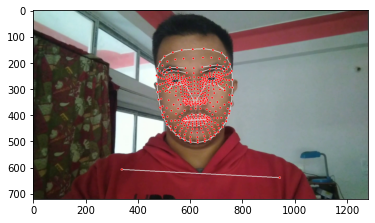

In [36]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))